# Курсовой проект для курса "Библиотеки Python для Data Science"

In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

# Загружаем данные

In [404]:
X_train = pd.read_csv(r'train_gb.csv')
y_train = X_train['Price']  # Создаем столбец целевой переменной
X_train.drop(columns='Price', axis=1, inplace=True)  # Удаляем колонку целевой переменной из X_train
# Оставим только информативные переменные в X_train
informative = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2']
X_train = X_train[informative]
X_train

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B
1,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B
2,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B
3,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
4,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B
9996,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A
9997,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A
9998,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B


In [405]:
y_train

0       184966.930730
1       300009.450063
2       220925.908524
3       175616.227217
4       150226.531644
            ...      
9995    196684.316040
9996    189050.289571
9997    159143.805370
9998    181595.339808
9999    218714.077615
Name: Price, Length: 10000, dtype: float64

# Предварительная обработка данных

## 1. Обработка пропущенных значений

In [406]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          10000 non-null  float64
 1   Square         10000 non-null  float64
 2   LifeSquare     7887 non-null   float64
 3   KitchenSquare  10000 non-null  float64
 4   Floor          10000 non-null  int64  
 5   HouseFloor     10000 non-null  float64
 6   HouseYear      10000 non-null  int64  
 7   Ecology_1      10000 non-null  float64
 8   Ecology_2      10000 non-null  object 
 9   Ecology_3      10000 non-null  object 
 10  Social_1       10000 non-null  int64  
 11  Social_2       10000 non-null  int64  
 12  Social_3       10000 non-null  int64  
 13  Healthcare_1   5202 non-null   float64
 14  Helthcare_2    10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
 16  Shops_2        10000 non-null  object 
dtypes: float64(7), int64(7), object(3)
memory usage: 1.

Есть пропуски в столбцах LifeSquare и Healthcare_1

In [407]:
# Заполняем пропуски средним арифметическим
X_train['LifeSquare'].fillna(X_train['LifeSquare'].mean(), inplace=True)
X_train['Healthcare_1'].fillna(X_train['Healthcare_1'].mean(), inplace=True)

## 2. Кодирование категориальных переменных

In [408]:
# Кодирование столбца Ecology_2
enc = OneHotEncoder()
new_df = pd.DataFrame(enc.fit_transform(X_train[['Ecology_2']]).toarray(), columns=['Ecology_2_A', 'Ecology_2_B'])
# Применяем горячее кодирование к столбцу Ecology_2
X_train.drop(columns=['Ecology_2'], axis=1, inplace=True)
X_train = X_train.join(new_df)

# Кодирование столца Ecology_3
enc = OneHotEncoder()
new_df = pd.DataFrame(enc.fit_transform(X_train[['Ecology_3']]).toarray(), columns=['Ecology_3_A', 'Ecology_3_B'])
# Применяем горячее кодирование к столбцу Ecology_3
X_train.drop(columns=['Ecology_3'], axis=1, inplace=True)
X_train = X_train.join(new_df)

# Кодирование столбца Shops_2
enc = OneHotEncoder()
new_df = pd.DataFrame(enc.fit_transform(X_train[['Shops_2']]).toarray(), columns=['Shops_2_A', 'Shops_2_B'])
# Применяем горячее кодирование к столбцу Shops_2
X_train.drop(columns=['Shops_2'], axis=1, inplace=True)
X_train = X_train.join(new_df)

X_train

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,1142.90446,0,11,0.0,1.0,0.0,1.0,0.0,1.0
1,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.00000,1,16,0.0,1.0,0.0,1.0,0.0,1.0
2,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.00000,1,3,0.0,1.0,0.0,1.0,0.0,1.0
3,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.00000,0,5,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.00000,2,4,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,46,7960,6,350.00000,3,11,0.0,1.0,0.0,1.0,0.0,1.0
9996,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,30,5562,0,1142.90446,0,5,0.0,1.0,0.0,1.0,1.0,0.0
9997,1.0,47.939008,37.199645,1.0,12,16.0,2015,0.072158,2,629,1,1142.90446,0,0,0.0,1.0,0.0,1.0,1.0,0.0
9998,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,30,5048,9,325.00000,2,5,0.0,1.0,1.0,0.0,0.0,1.0


## 3. Удаление выбросов из данных

In [409]:
# Числовые признаки
number_features = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1']

In [410]:
for feature in number_features:
    Q1 = X_train[feature].quantile(q=0.25)  # Первый квартиль
    Q3 = X_train[feature].quantile(q=0.75)  # Второй квартиль
    IQR = Q3 - Q1  # Межквартильное расстояние
    for i in X_train.index:  # Удаляем выбросы с датафрейма по каждому из столбцов
        if (X_train.loc[i, feature] > Q3 + 1.5 * IQR) or (X_train.loc[i, feature] < Q1 - 1.5 * IQR):
            X_train.drop(index=i, inplace=True)
            y_train.drop(index=i, inplace=True)

In [411]:
X_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000,5578.00000,5578.00000,5578.000000,5578.000000,5578.000000,5578.000000
mean,1.764073,53.700799,34.231298,5.148082,8.658300,12.978308,1985.948189,0.119746,19.646827,4377.082288,1.897634,1005.185382,0.486734,2.721764,0.00251,0.99749,0.023306,0.976694,0.103801,0.896199
std,0.747660,15.145676,10.452063,4.021051,5.077713,6.566884,17.476673,0.123536,16.621450,3823.641185,2.326903,278.546649,0.649895,3.074363,0.05004,0.05004,0.150887,0.150887,0.305029,0.305029
min,0.000000,17.046188,2.072088,0.000000,1.000000,0.000000,1937.000000,0.000000,0.000000,168.000000,0.000000,165.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,41.587082,27.535036,1.000000,5.000000,9.000000,1977.000000,0.017647,4.000000,915.000000,0.000000,1036.000000,0.000000,0.000000,0.00000,1.00000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,50.103630,37.199645,5.000000,8.000000,14.000000,1977.000000,0.072158,19.000000,3856.000000,1.000000,1142.904460,0.000000,1.000000,0.00000,1.00000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,63.838207,37.199645,8.000000,12.000000,17.000000,2002.750000,0.211401,33.000000,6783.000000,3.000000,1142.904460,1.000000,5.000000,0.00000,1.00000,0.000000,1.000000,0.000000,1.000000
max,3.000000,100.582649,62.923074,20.000000,24.000000,29.000000,2020.000000,0.458174,53.000000,14892.000000,10.000000,1547.000000,2.000000,11.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


In [412]:
X_train

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,1142.90446,0,11,0.0,1.0,0.0,1.0,0.0,1.0
2,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.00000,1,3,0.0,1.0,0.0,1.0,0.0,1.0
3,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.00000,0,5,0.0,1.0,0.0,1.0,0.0,1.0
5,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,35,7715,4,990.00000,0,6,0.0,1.0,0.0,1.0,0.0,1.0
7,2.0,80.312926,37.199645,0.0,14,0.0,1977,0.075779,6,1437,3,1142.90446,0,2,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,3.0,78.249637,49.385096,10.0,5,16.0,1976,0.300323,52,10311,6,1142.90446,1,9,0.0,1.0,0.0,1.0,0.0,1.0
9994,2.0,64.864198,37.199645,1.0,17,17.0,1977,0.075779,6,1437,3,1142.90446,0,2,0.0,1.0,0.0,1.0,0.0,1.0
9996,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,30,5562,0,1142.90446,0,5,0.0,1.0,0.0,1.0,1.0,0.0
9997,1.0,47.939008,37.199645,1.0,12,16.0,2015,0.072158,2,629,1,1142.90446,0,0,0.0,1.0,0.0,1.0,1.0,0.0


## 4. Масштабирование данных

In [414]:
columns = X_train.columns
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=columns)
X_train

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,0.315582,-0.377649,-0.458185,0.211884,-0.326613,-0.605868,-0.969848,-0.248582,0.803442,0.941312,1.333379,0.494464,-0.749010,2.692908,-0.050161,0.050161,-0.154473,0.154473,-0.340328,0.340328
1,0.315582,-0.577962,-0.481641,-1.280397,-0.129657,-0.148989,-1.027072,-0.567566,0.863611,0.884555,-0.815592,-2.786804,0.789840,0.090510,-0.050161,0.050161,-0.154473,0.154473,-0.340328,0.340328
2,0.315582,-0.022967,1.770165,0.958024,-0.129657,0.612475,-0.512053,2.575510,0.201756,0.355169,0.473791,0.282975,-0.749010,0.741110,-0.050161,0.050161,-0.154473,0.154473,-0.340328,0.340328
3,1.653208,1.761960,1.191491,1.704165,-0.720527,0.612475,1.433571,1.535993,0.923779,0.873047,0.903585,-0.054521,-0.749010,1.066409,-0.050161,0.050161,-0.154473,0.154473,-0.340328,0.340328
4,0.315582,1.757235,0.284022,-1.280397,1.052084,-1.976504,-0.512053,-0.355936,-0.821111,-0.768991,0.473791,0.494464,-0.749010,-0.234790,-0.050161,0.050161,-0.154473,0.154473,-0.340328,0.340328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,1.653208,1.620993,1.449968,1.206738,-0.720527,0.460182,-0.569278,1.461866,1.946646,1.552041,1.763174,0.494464,0.789840,2.042309,-0.050161,0.050161,-0.154473,0.154473,-0.340328,0.340328
5574,0.315582,0.737134,0.284022,-1.031684,1.642954,0.612475,-0.512053,-0.355936,-0.821111,-0.768991,0.473791,0.494464,-0.749010,-0.234790,-0.050161,0.050161,-0.154473,0.154473,-0.340328,0.340328
5575,-1.022044,-0.804213,-1.310106,0.958024,0.855127,0.003304,0.804104,-0.969406,0.622936,0.309920,-0.815592,0.494464,-0.749010,0.741110,-0.050161,0.050161,-0.154473,0.154473,2.938342,-2.938342
5576,-1.022044,-0.380459,0.284022,-1.031684,0.658170,0.460182,1.662468,-0.385252,-1.061785,-0.980327,-0.385798,0.494464,-0.749010,-0.885389,-0.050161,0.050161,-0.154473,0.154473,2.938342,-2.938342


# Обучение моделей и сравнение их метрик

In [430]:
# Разобьем тренировочную выборку на обучающую и тестовую
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [431]:
# Линейная регрессия
lr = LinearRegression()
lr.fit(X_train_train, y_train_train)
y_pred_train = lr.predict(X_train_train)
y_pred_test = lr.predict(X_train_test)
print(f'R2_score на train: {r2_score(y_train_train, y_pred_train)}')
print(f'R2_score на test: {r2_score(y_train_test, y_pred_test)}')

R2_score на train: 0.611658864550032
R2_score на test: 0.6013860813595675


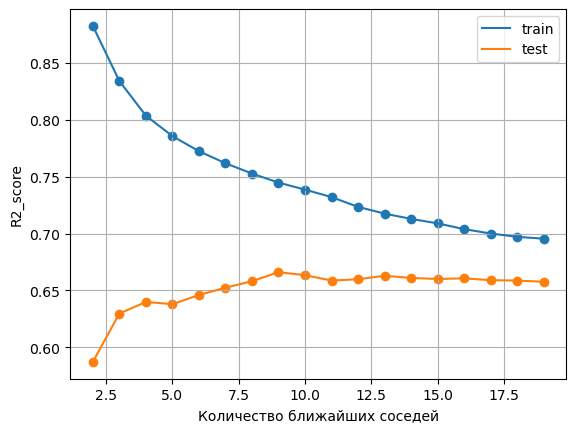

In [432]:
# Метод ближайших соседей
r2_train = []
r2_test = []
k_max = 20
for k in range(2, k_max):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_train, y_train_train)
    y_pred_train = knn.predict(X_train_train)
    y_pred_test = knn.predict(X_train_test)
    r2_train.append(r2_score(y_train_train, y_pred_train))
    r2_test.append(r2_score(y_train_test, y_pred_test))
plt.plot(range(2, k_max), r2_train)
plt.plot(range(2, k_max), r2_test)
plt.scatter(range(2, k_max), r2_train)
plt.scatter(range(2, k_max), r2_test)
plt.xlabel('Количество ближайших соседей')
plt.ylabel('R2_score')
plt.grid()
plt.legend(['train', 'test'])
plt.show()

Максимальное значение коэффициента детерминации R2 на тестовой выборке при **k=9** - количество ближайших соседей

In [433]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train_train, y_train_train)
y_pred_train = knn.predict(X_train_train)
y_pred_test = knn.predict(X_train_test)
print(f'R2 при k=9 = {r2_score(y_train_test, y_pred_test)}')

R2 при k=9 = 0.6660766883491147


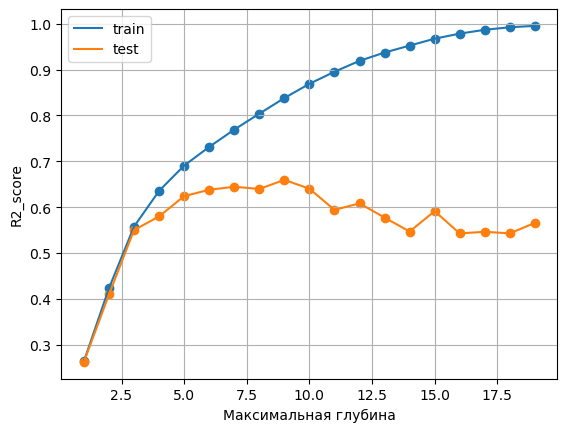

In [434]:
# Дерево решений
r2_train = []
r2_test = []
max_depth = 20
for k in range(1, max_depth):
    tree = DecisionTreeRegressor(max_depth=k)
    tree.fit(X_train_train, y_train_train)
    y_pred_train = tree.predict(X_train_train)
    y_pred_test = tree.predict(X_train_test)
    r2_train.append(r2_score(y_train_train, y_pred_train))
    r2_test.append(r2_score(y_train_test, y_pred_test))
plt.plot(range(1, max_depth), r2_train)
plt.plot(range(1, max_depth), r2_test)
plt.scatter(range(1, max_depth), r2_train)
plt.scatter(range(1, max_depth), r2_test)
plt.xlabel('Максимальная глубина')
plt.ylabel('R2_score')
plt.grid()
plt.legend(['train', 'test'])
plt.show()

Максимальное значение коэффициента детерминации R2 на тестовой выборке при **max_depth=9** - максимальная глубина дерева решений

In [435]:
tree = DecisionTreeRegressor(max_depth=9)
tree.fit(X_train_train, y_train_train)
y_pred_train = tree.predict(X_train_train)
y_pred_test = tree.predict(X_train_test)
print(f'R2 при max_depth=9 = {r2_score(y_train_test, y_pred_test)}')

R2 при max_depth=9 = 0.6446372393076834


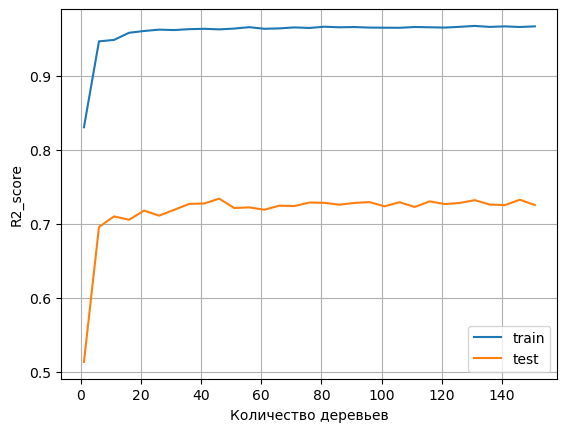

In [444]:
# Случайный лес
r2_train = []
r2_test = []
max_estimators = 156
for k in range(1, max_estimators, 5):
    rfr = RandomForestRegressor(n_estimators=k)
    rfr.fit(X_train_train, y_train_train)
    y_pred_train = rfr.predict(X_train_train)
    y_pred_test = rfr.predict(X_train_test)
    r2_train.append(r2_score(y_train_train, y_pred_train))
    r2_test.append(r2_score(y_train_test, y_pred_test))
plt.plot(range(1, max_estimators, 5), r2_train)
plt.plot(range(1, max_estimators, 5), r2_test)
plt.xlabel('Количество деревьев')
plt.ylabel('R2_score')
plt.grid()
plt.legend(['train', 'test'])
plt.show()

Максимальное значение коэффициента детерминации R2 на тестовой выборке при n_estimators=46 - количество деревьев в алгоритме случайного леса

In [446]:
rfr = RandomForestRegressor(n_estimators=46)
rfr.fit(X_train_train, y_train_train)
y_pred_train = rfr.predict(X_train_train)
y_pred_test = rfr.predict(X_train_test)
print(f'R2 при n_estimators=46 = {r2_score(y_train_test, y_pred_test)}')

R2 при n_estimators=46 = 0.7258052737948032


Именна данная модель показала наилучшие показания метрики. Её и будем использовать для предсказания на тестовой выборке

# Предсказание для тестовой выборки

In [480]:
# Загружаем тестовую выборку
X_test = pd.read_csv(r'test_gb.csv')
X_test.drop(columns=['Id', 'DistrictId'], inplace=True)
X_test

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A


In [481]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          5000 non-null   float64
 1   Square         5000 non-null   float64
 2   LifeSquare     3959 non-null   float64
 3   KitchenSquare  5000 non-null   float64
 4   Floor          5000 non-null   int64  
 5   HouseFloor     5000 non-null   float64
 6   HouseYear      5000 non-null   int64  
 7   Ecology_1      5000 non-null   float64
 8   Ecology_2      5000 non-null   object 
 9   Ecology_3      5000 non-null   object 
 10  Social_1       5000 non-null   int64  
 11  Social_2       5000 non-null   int64  
 12  Social_3       5000 non-null   int64  
 13  Healthcare_1   2623 non-null   float64
 14  Helthcare_2    5000 non-null   int64  
 15  Shops_1        5000 non-null   int64  
 16  Shops_2        5000 non-null   object 
dtypes: float64(7), int64(7), object(3)
memory usage: 664

In [482]:
# Заполняем пропуски средним арифметическим
X_test['LifeSquare'].fillna(X_test['LifeSquare'].mean(), inplace=True)
X_test['Healthcare_1'].fillna(X_test['Healthcare_1'].mean(), inplace=True)

In [483]:
# Кодирование столбца Ecology_2
enc = OneHotEncoder()
new_df = pd.DataFrame(enc.fit_transform(X_test[['Ecology_2']]).toarray(), columns=['Ecology_2_A', 'Ecology_2_B'])
# Применяем горячее кодирование к столбцу Ecology_2
X_test.drop(columns=['Ecology_2'], axis=1, inplace=True)
X_test = X_test.join(new_df)

# Кодирование столца Ecology_3
enc = OneHotEncoder()
new_df = pd.DataFrame(enc.fit_transform(X_test[['Ecology_3']]).toarray(), columns=['Ecology_3_A', 'Ecology_3_B'])
# Применяем горячее кодирование к столбцу Ecology_3
X_test.drop(columns=['Ecology_3'], axis=1, inplace=True)
X_test = X_test.join(new_df)

# Кодирование столбца Shops_2
enc = OneHotEncoder()
new_df = pd.DataFrame(enc.fit_transform(X_test[['Shops_2']]).toarray(), columns=['Shops_2_A', 'Shops_2_B'])
# Применяем горячее кодирование к столбцу Shops_2
X_test.drop(columns=['Shops_2'], axis=1, inplace=True)
X_test = X_test.join(new_df)

X_test

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,11,2748,1,1146.657263,0,0,0.0,1.0,0.0,1.0,0.0,1.0
1,2.0,69.263183,36.158810,1.0,6,1.0,1977,0.075779,6,1437,3,1146.657263,0,2,0.0,1.0,0.0,1.0,0.0,1.0
2,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,30,7538,87,4702.000000,5,5,0.0,1.0,0.0,1.0,0.0,1.0
3,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,23,4583,3,1146.657263,3,3,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,2,629,1,1146.657263,0,0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,36,5992,0,1146.657263,1,1,0.0,1.0,0.0,1.0,0.0,1.0
4996,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,1,264,0,1146.657263,0,1,0.0,1.0,0.0,1.0,0.0,1.0
4997,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,74,19083,2,1146.657263,5,15,0.0,1.0,0.0,1.0,0.0,1.0
4998,2.0,81.305222,36.158810,0.0,4,0.0,1977,0.072158,2,629,1,1146.657263,0,0,0.0,1.0,0.0,1.0,1.0,0.0


In [484]:
# Стандартизация тестовой выборки
columns = X_test.columns
X_test = ss.transform(X_test)
X_test = pd.DataFrame(X_test, columns=columns)
X_test

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,0.315582,-0.252118,-0.076405,0.211884,-0.523570,0.155596,-0.798175,1.541822,-0.520268,-0.426093,-0.385798,0.507938,-0.749010,-0.885389,-0.050161,0.050161,-0.154473,0.154473,-0.340328,0.340328
1,0.315582,1.027605,0.184431,-1.031684,-0.523570,-1.824211,-0.512053,-0.355936,-0.821111,-0.768991,0.473791,0.507938,-0.749010,-0.234790,-0.050161,0.050161,-0.154473,0.154473,-0.340328,0.340328
2,-1.022044,-2.648055,-1.749386,1.704165,-1.311397,-1.215039,-4.403303,-0.969406,0.622936,0.826752,36.576508,13.272987,6.945236,0.741110,-0.050161,0.050161,-0.154473,0.154473,-0.340328,0.340328
3,0.315582,1.277430,1.694511,0.958024,2.627737,1.373939,1.204674,-0.144694,0.201756,0.053859,0.473791,0.507938,3.867538,0.090510,-0.050161,0.050161,-0.154473,0.154473,-0.340328,0.340328
4,-1.022044,-0.407657,0.876104,-1.031684,1.642954,0.612475,1.776917,-0.385252,-1.061785,-0.980327,-0.385798,0.507938,-0.749010,-0.885389,-0.050161,0.050161,-0.154473,0.154473,2.938342,-2.938342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.653208,0.887007,1.586288,0.211884,-0.720527,-0.605868,-0.740951,-0.968032,0.983948,0.422389,-0.815592,0.507938,0.789840,-0.560089,-0.050161,0.050161,-0.154473,0.154473,-0.340328,0.340328
4996,-1.022044,-0.891577,-1.188794,1.206738,0.658170,0.612475,1.776917,-0.911747,-1.121954,-1.075794,-0.815592,0.507938,-0.749010,-0.560089,-0.050161,0.050161,-0.154473,0.154473,-0.340328,0.340328
4997,1.653208,1.594088,1.344480,0.958024,2.824694,1.373939,0.174638,-0.234338,3.270355,3.846395,0.043997,0.507938,6.945236,3.994107,-0.050161,0.050161,-0.154473,0.154473,-0.340328,0.340328
4998,0.315582,1.822758,0.184431,-1.280397,-0.917484,-1.976504,-0.512053,-0.385252,-1.061785,-0.980327,-0.385798,0.507938,-0.749010,-0.885389,-0.050161,0.050161,-0.154473,0.154473,2.938342,-2.938342


In [485]:
y_pred = rfr.predict(X_test)
index = X_test.index
answer = pd.DataFrame({'index': index,
                       'y_pred': y_pred})
answer

,index,y_pred
0,0,161824.332349
1,1,200979.887786
2,2,125879.554397
3,3,332628.537050
4,4,138319.065818
...,...,...
4995,4995,254735.958796
4996,4996,128854.939110
4997,4997,347943.933742
4998,4998,199648.376673


In [488]:
answer.to_csv('ShinPredictions.csv', index=False)